# Advertise This!!
**Identifying Markets to Advertise an E-Learning Platform**

# Index

- [1 Introduction](#1)
- [2 Reading the Data](#2)
- [3 Yeah I wanna be a Hacker...a Web Developer..a Data Analyst..etc.](#3)
- [4 U.K, Bahrain, India, Australia..Potential Markets](#4)
- [5 Show Me the Money!!](#5)
- [6 Laying somewhere Out There - Outlier](#6)
- [7 So How Mean.. I mean, Market Mean](#7)
- [8 Conclusion](#8)
- [9 Learning](#9)

# 1

## Introduction

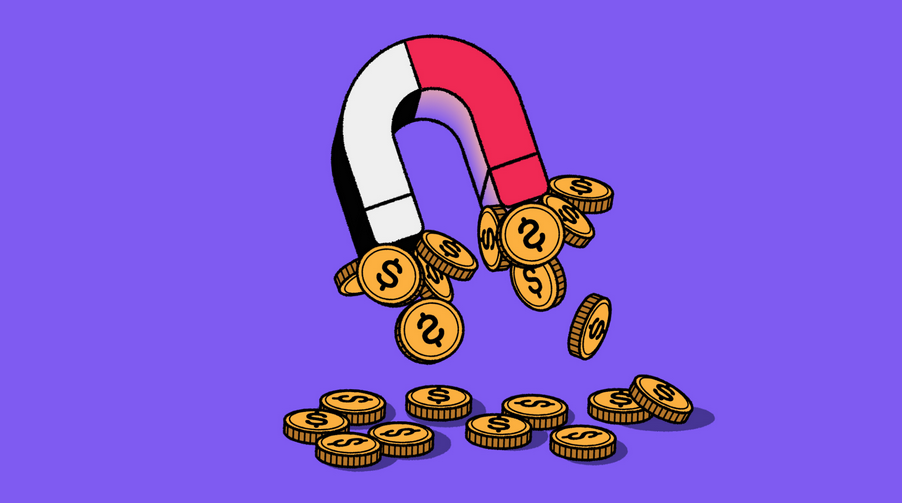
*Source*:[digiday.com](https://digiday.com/marketing/agencies-market-thyselves-how-independent-shops-are-taking-different-routes-to-advertise-their-superpowers/)

E-learning is a rapidly growing business. Unlike schools or universities E-learning platforms provide a more flexible learning platform allowing its users to learn a large number of skills from anywhere in the world.

The rapid growth of E-learning platforms has given rise to stiff competition for new comers of the business. We've been approached by an E-learning platform who have consulted us on the best markets to advertise their product.

The platform currently specializes in courses associated to web and mobile development in addition to other courses related to data science and game development.

Our goal in this project is to identify two of the best markets to advertise in.

[Index](#Index)

# 2

## Reading the Data

In order to analyse for the best markets we would need to take up an international survey and consolidate the data therein to understand what learners across the world are interested in and what they might be after. However, the cost of the endeavour would go many times over.

We shall instead rely on an existig [survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969) conducted by [freeCodeCamp](https://www.freecodecamp.org/) in 2017. The survey had responses from more than 30,000 new coders which makes the dataset ideal for our analysis given the large response. 

We shall read the dataset below.

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

pd.options.display.max_rows=200

In [290]:
coder_survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)
coder_survey.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN


In [291]:
coder_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


The dataset has a 136 columns and 18,174 rows. Each row highlights the responses survey responders.We will have to be selective with the columns that we choose for the analysis of the best markets to advertise. While most of the columns are self explanatory it may be hard to make sense of some of the columns or the reasons behind them.

Information related to these columns have been provided in the [github repository](https://github.com/freeCodeCamp/2017-new-coder-survey) of freeCode Camp. Now that we have a rough idea about the data, we can begin analysis of the same.

[Index](#Index)

# 3

## Yeah I wanna be a Hacker...a Web Developer..a Data Analyst..etc.
**Analysing the learning interests of survey participants**

We shall begin the analysis by taking a look at the *JobRoleInterest* table which details the preferences of new coders with respect to what they are keen on learning.

In [292]:
#Analyse JobRoleInterest column
coder_survey['JobRoleInterest'].head(10)

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
5                                                  NaN
6                             Full-Stack Web Developer
7                                                  NaN
8                                                  NaN
9    Full-Stack Web Developer,   Quality Assurance ...
Name: JobRoleInterest, dtype: object

Since many of the entries include multiple roles, we must attempt to extract the roles individually and find out how many roles the users had to select from.

In [293]:
#Extracting Roles
coder_survey['JobRoleInterest']=coder_survey['JobRoleInterest'].str.replace("  "," ").str.strip()
roles = coder_survey[coder_survey['JobRoleInterest'].str.contains(',')==False]['JobRoleInterest'].unique()

Being new coders, most survey participants are either unsure or overly enthusiastic about the potential job roles on offer. The job roles selected range from *"i don't know what the difference is between most of these soz lol"* to *'Any of them.'*. Some have also selected a mish-mash of roles that are not very much related to each other like *DevOps / SysAdmin,   Data Scientist, Information Security*.

**Marketing is a costly business.** In order maximize ROI (Return on Investment) we need to get a **focus on a target audience** as opposed to focusing on a very wide audience and hoping that we can get a couple of customers out of them.

The e-learning platform has made it clear that they have courses focused on web and mobile development. We shall initially focus our marketing on crowds that are interested specifically in these courses. Once we have them on board we could focus on upselling our other courses to these crowds while also considerably developing the other courses to attract other customers.

We shall classify all the survey participants that are exclusively interested in mobile and web development topics alone. If there are survey participants that have included other roles besides those related to web or mobile development we shall have to put them in a separate category.

In [294]:
#Remove all participants that have not selected any roles.
survey_no_null_role=coder_survey[coder_survey['JobRoleInterest'].isnull()==False].copy()

In [295]:
#Set the 'JobRoleInterest' column as a Series of lists containing the choices made by the participant
survey_no_null_role['JobRoleInterest'] = survey_no_null_role['JobRoleInterest'].str.split(',')

In [296]:
#List of roles to focus on
roles=['Full-Stack Web Developer','Back-End Web Developer','Front-End Web Developer','Mobile Developer']

#Classify the job role selections for each participant 
def assess(a_list):
    role_count=0
    for value in a_list:
        for role in roles:
            if value.strip() == role.strip():
                role_count+=1
#     Creates a more lineant sample that allows one more role other than web or mobile development
#     if role_count+1 == len(a_list) & len(a_list)>1: //For future analysis

    #Creates a stricter sample that only includes roles related to web or mobile development
    if role_count == len(a_list) & len(a_list)==1:
        return a_list[0]
    if role_count == len(a_list):
        
        #Mixed Interests are those interested in web, mobile or web & mobile development
        return 'Mixed Interests'
    else:
        
        #Multiple or Other Interests are those who are interested in multiple roles that may include web and/or mobile dev.
        return 'Multiple or Other Interests'
survey_no_null_role['web_mobile']=survey_no_null_role['JobRoleInterest'].apply(assess)
survey_no_null_role[['JobRoleInterest','web_mobile']].head(10)

,JobRoleInterest,web_mobile
1,[Full-Stack Web Developer],Full-Stack Web Developer
2,"[Front-End Web Developer, Back-End Web Develo...",Multiple or Other Interests
3,"[Front-End Web Developer, Full-Stack Web Deve...",Mixed Interests
4,"[Full-Stack Web Developer, Information Securi...",Multiple or Other Interests
6,[Full-Stack Web Developer],Full-Stack Web Developer
9,"[Full-Stack Web Developer, Quality Assurance...",Multiple or Other Interests
11,"[DevOps / SysAdmin, Data Scientist, Informa...",Multiple or Other Interests
13,"[Back-End Web Developer, Full-Stack Web Devel...",Mixed Interests
14,[Full-Stack Web Developer],Full-Stack Web Developer
15,[Full-Stack Web Developer],Full-Stack Web Developer


We have classified the job roles as selected by the user as follows:
- **Multiple or Other Interests**: include responses with multiple roles selected. These roles may or may not include web development. We will not be considering this group as our analysis progresses as these choices are not sure of what they are after.
- **Mixed Interests**: This classification is for those roles that include a mix of web and mobile development. They also include user choices like *Full-Stack Web Developer,Front-End Web Developer* or *Full-Stack Web Developer,Back-End Web Developer,Mobile Developer*. Classifying these choices as such has been done with the understanding that while a Full Stack Developer role includes understanding of front and back-end development, the user is focused on gaining a better understanding of either front or back-end technology based on their selection.
- The **other classifications** are based on users who are single minded and have chosen exactly one role. From that perspective greater than 11% of the participants have a clear goal on becoming *Full-Stack Web Developers*

In [297]:
#Identify potential customers
survey_no_null_role['potential_customer'] = survey_no_null_role['web_mobile'].apply(lambda web_mobile_value:'Yes' if web_mobile_value!='Multiple or Other Interests' else 'No')
customers = pd.DataFrame(index=survey_no_null_role['potential_customer'].unique(),columns=['absolute','relative(%)'])
customers['relative(%)']=survey_no_null_role['potential_customer'].value_counts(normalize=True).mul(100).sort_values(ascending=False).round(1)
customers['absolute']=survey_no_null_role['potential_customer'].value_counts()

Based on the above classification we were able to consolidate those interested in web and mobile development and those who are not. 32% of the survey participants are interested in what we readily have to offer. This will be our target market.

We can further breakdown the population of interest based on their individual interests.

In [298]:
#Calculate relative and absolute counts of potential customers
web_mobile_roles = survey_no_null_role[survey_no_null_role['potential_customer'] == 'Yes']['web_mobile']
customer_breakup = pd.DataFrame(index=web_mobile_roles.unique(),columns=['absolute','relative(%)'])
customer_breakup['relative(%)'] = survey_no_null_role[survey_no_null_role['potential_customer'] == 'Yes']['web_mobile'].value_counts(normalize=True).mul(100).round(1).sort_values(ascending=True)
customer_breakup['absolute'] = survey_no_null_role[survey_no_null_role['potential_customer'] == 'Yes']['web_mobile'].value_counts()

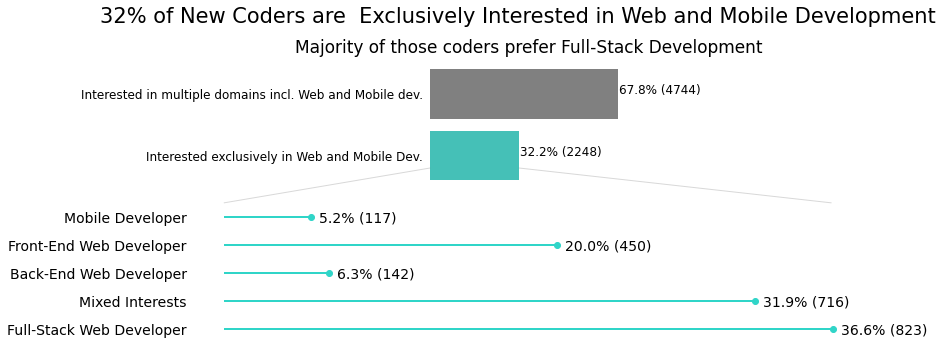

In [299]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig = plt.figure(figsize=(12,5))

#Mobile & Web Dev vs. Others
ax1 = fig.add_subplot(2,3,2)
for each_key in ax1.spines.keys():
    ax1.spines[each_key].set_visible(False)
bar_colors=['grey','#30D5C8']

    #Plot 1
sns.barplot(y = customers.index, x = customers['relative(%)'].sort_values(ascending=False), palette=bar_colors)
for i in range(len(customers)):
    ax1.text(s=str(customers.iloc[len(customers)-1-i,1])+'%'+' '+'('+str(customers.iloc[len(customers)-1-i,0])+')',
             x=customers.iloc[len(customers)-1-i,1]+0.5,
             y=i,
             size=12)

ax1.tick_params(axis='y',left=False,labelsize=12)
ax1.tick_params(axis='x',bottom=False,labelbottom=False)
ax1.set_yticklabels(['Interested in multiple domains incl. Web and Mobile dev.',
                     'Interested exclusively in Web and Mobile Dev.'])
ax1.set_ylabel(None)
ax1.set_xlabel(None)
#---

#Breakup of Mobile and Web Developers
ax2 = fig.add_subplot(2,3,(4,6))
for spine in ['top','right','left','bottom']:
    ax2.spines[spine].set_visible(False)

    #Plot 2
ax2.hlines(y=customer_breakup.index,
           xmin=0,
           xmax=customer_breakup['relative(%)'],
           color='#30D5C8',
           linewidth=2)
ax2.scatter(y=customer_breakup.index,
            x=customer_breakup['relative(%)'],
            color='#30D5C8')
for i in range(len(customer_breakup)):
    ax2.text(s=str(customer_breakup.iloc[i,1])+'%'+' '+'('+str(customer_breakup.iloc[i,0])+')',
             x=customer_breakup.iloc[i,1]+0.5,
             y=i-0.2,
             size=14)
ax2.tick_params(axis='both',left=False,bottom=False,labelbottom=False,labelsize=14)
#---

# Create left side of Connection patch for first axes
con1 = patches.ConnectionPatch(xyA=(0,1.2), coordsA=ax1.transData,
                               xyB=(0,4.5), coordsB=ax2.transData,
                               color = 'grey',alpha=0.3)
# Add left side to the figure
fig.add_artist(con1)

con2 = patches.ConnectionPatch(xyA=(32.2, 1.2), coordsA=ax1.transData,
                               xyB=(36.5, 4.5), coordsB=ax2.transData,
                               color = 'grey',alpha=0.3)
# Add left side to the figure
fig.add_artist(con2)

plt.suptitle('32% of New Coders are  Exclusively Interested in Web and Mobile Development',fontsize=21,va='bottom')
ax1.set_title(label='Majority of those coders prefer Full-Stack Development',fontsize=17,va='bottom')
plt.show()

From the above graph it is clear that of the survey participants that are interested in web and mobile development 36.5% hope to undertake the job role of a Full-Stack Developer. However, the interest in mobile development in comparison is significantly less at 5.2%.

[Index](#Index)

# 4

## U.K, Bahrain, India, Australia..Potential Markets
**Identifying potential markets to advertise in**

Now that we have the survey participants that could become our potential customers we shall focus on how to advertise to them. We can begin our analysis by verifying which countries our filtered set of survey participants belong to. We shall identify the top 10 countries where most of the survey participants are concentrated in and based on the numbers identify the markets to advertise in.

In [300]:
#Identify location of coders
survey_no_null_role[survey_no_null_role['web_mobile']!= 'Multiple or Other Interests']['CountryLive'].value_counts(ascending=False,normalize=True).mul(100).round(1).head(10).astype('str')+('%')

United States of America    41.1%
India                        8.1%
United Kingdom               4.9%
Canada                       3.5%
Poland                       2.6%
Ukraine                      2.5%
Brazil                       2.0%
Russia                       1.9%
Nigeria                      1.5%
Romania                      1.5%
Name: CountryLive, dtype: object

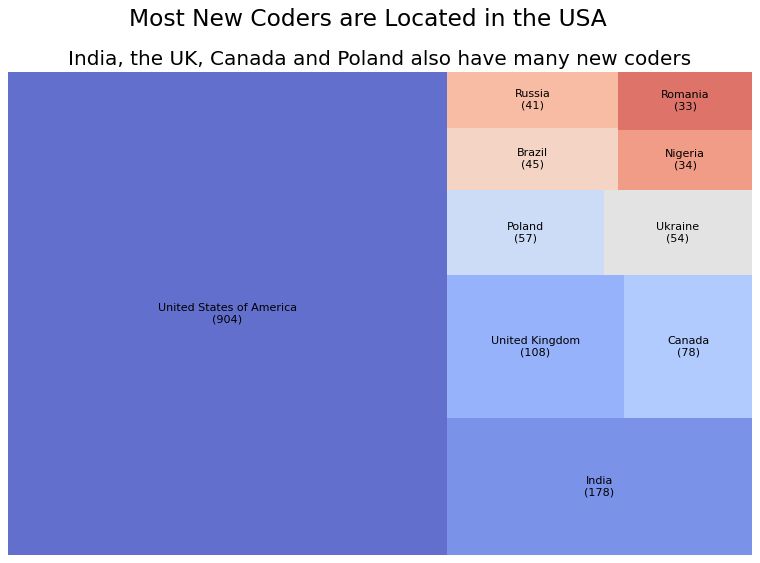

In [301]:
import squarify
top10 = survey_no_null_role[survey_no_null_role['web_mobile']!= 'Multiple or Other Interests']['CountryLive'].value_counts().head(10)
labels = [value+'\n'+'('+str(top10[value])+')' for value in top10.index]
sizes = top10.tolist()
colors = [plt.cm.coolwarm(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

plt.suptitle('Most New Coders are Located in the USA',fontsize=21)
plt.title('India, the UK, Canada and Poland also have many new coders',fontsize=18)
plt.axis('off')
plt.show()

The courses on the E-learning platform are currently delivered in English and given that the top 4 countries of the top 10 are countries where the language is prominent the four countries can be considered as potential locations where we can advertise our 

The markets we will be further analysing for potential marketing are United States of America, India, United Kingdom and Canada. The data located for the same will be filtered out and analysed separately.

In [302]:
#Filter data from the top 4 locations where most coders are situated
survey_web_mobile=survey_no_null_role[(survey_no_null_role['web_mobile']!= 'Multiple or Other Interests') & 
                                      (survey_no_null_role['CountryLive'].isin(['United States of America','India',
                                                                                'United Kingdom','Canada']))].copy()

[Index](#Index)

# 5

## Show Me the Money!!
**Evaluating the amount new coders are willing to spend to learn**

Now that we have the potential markets that we could advertise in, we need to evaluate how much new coders are willing to invest to learn.

The E-platform is planning to offer subscriptions for \\$59.00 a month. Accordingly, advertising must be focused only on markets that are willing to pay that amount.

We can calculate the monthly payment of new coders for the purpose of learning using the *MonthsProgramming* column and *MoneyForLearning* column. A new column called *monthly_spending* will track the value spent by new coders on a monthly basis.

In [303]:
#Analyze the *MonthsProgramming* column
survey_web_mobile['MonthsProgramming'].value_counts().sort_index().head(10)

#Replace 0 with 1
survey_web_mobile['MonthsProgramming'].replace(0.0,1,inplace=True)
survey_web_mobile['MonthsProgramming'].value_counts().sort_index().head(10)

#Analyze *MoneyForLearning* column
survey_web_mobile['MoneyForLearning'].value_counts().sort_index().head(10)

#Calculate monthly spend
survey_web_mobile['monthly_spending'] = survey_web_mobile['MoneyForLearning']/survey_web_mobile['MonthsProgramming']
survey_web_mobile['monthly_spending'].head(10)

#Eliminate null values from *monthly_spending* column.
survey_monthly_spent = survey_web_mobile[(survey_web_mobile['monthly_spending'].notnull())& 
                                         (survey_web_mobile['CountryLive'].notnull())].copy()

While analyzing the *MonthsProgramming* column it was noticed that some of the respondents set the value against the column to 0. This can cause issues when attempting to calculate the monthly spent. Assuming that most users selected 0 because they had just started the course we will be replacing the 0 with a 1.

Now that we have analyzed both columns we can proceed to calculated the monthly spend of new coders.

There are a number of rows that have yielded null values during of the new *monthly_spending* column. These values need to be removed before we proceed to evaluating the mean spend for each country.

In [304]:
#Calculate mean spend for the potential markets
'$'+survey_monthly_spent.groupby('CountryLive')['monthly_spending'].mean().round(2).astype(str)

CountryLive
Canada                      $165.12
India                       $177.05
United Kingdom               $89.49
United States of America    $211.94
Name: monthly_spending, dtype: object

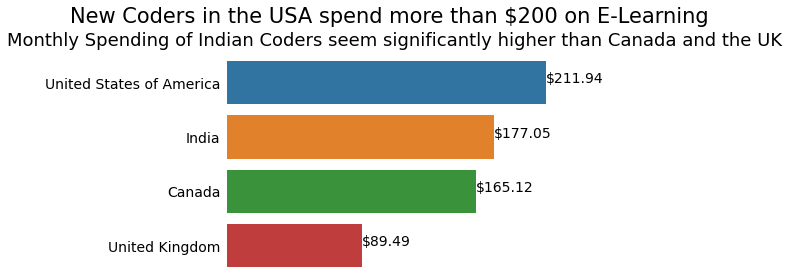

In [305]:
#Plot mean monthly spending for all four countries
import seaborn as sns
country_spending = survey_monthly_spent.groupby('CountryLive')['monthly_spending'].mean().round(2).sort_values(ascending=False)

sns.barplot(y=country_spending.index,x=country_spending)
sns.despine(left=True,bottom=True)
plt.tick_params(bottom=False,left=False,labelbottom=False,labelsize=14)
plt.xlabel(None)
plt.ylabel(None)

for i in range(len(country_spending)):
    plt.text(s='$'+str(country_spending[i]),
             x=country_spending[i],
             y=i,size=14)
    
plt.suptitle('New Coders in the USA spend more than $200 on E-Learning',fontsize=21,va='bottom')
plt.title('Monthly Spending of Indian Coders seem significantly higher than Canada and the UK',fontsize=18,va='bottom')
plt.show()

The average monthly spending seems a bit unusual. Given that the spending is in US dollars, the fact that spending in India is higher than the UK and Canada is what seems unusual. 

While analyzing the GDP per capita data for these countries for the year 2017, the value for this parameter is signficantly less than those of the other countries. So it is surprising that the monthly spending of new coders from India is higher than UK or Canada. This has to be investigated further.

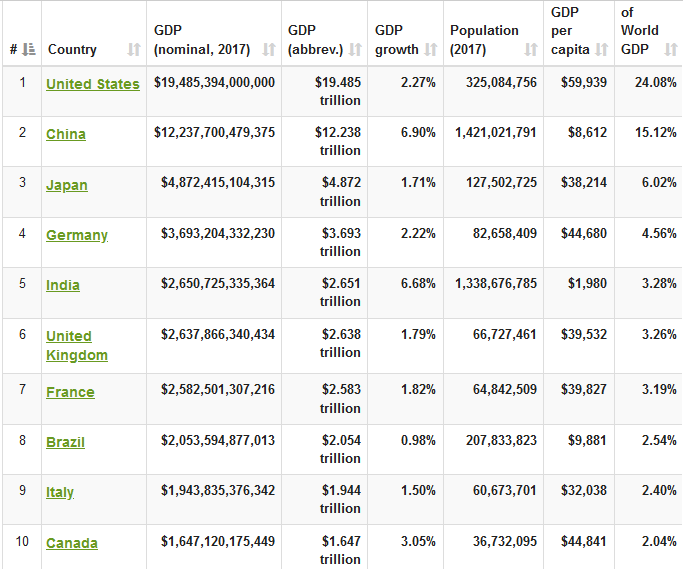
*Source*: [worldometers](https://www.worldometers.info/gdp/gdp-by-country/)

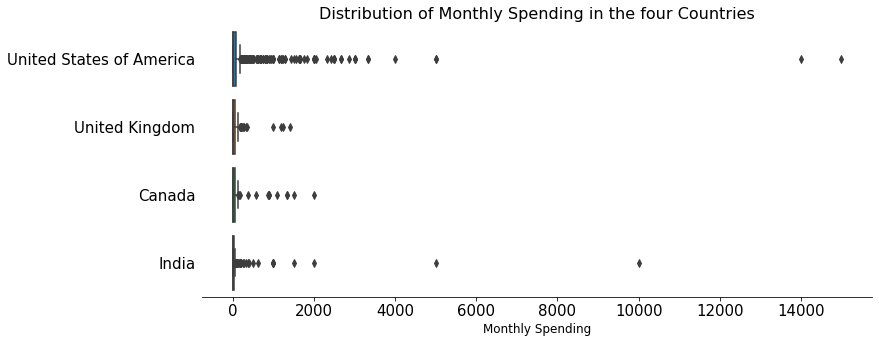

In [306]:
import seaborn as sns
fig=plt.figure(figsize=(12,5))
sns.boxplot(data=survey_monthly_spent, y='CountryLive',x='monthly_spending')
sns.despine(left=True)
plt.tick_params(left=False,labelsize=15)
plt.ylabel(None)
plt.xlabel(xlabel='Monthly Spending',fontsize=12)
plt.title('Distribution of Monthly Spending in the four Countries', fontsize=16)
plt.show()

An initial analysis of the monthly spending reveals that there are many outliers in each of the four countries. They outliers are likely to be what skewed the mean signficantly. We will need to analyse the monthly spending and look for reasons behind these outliers.

[Index](#Index)

# 6

## Laying somewhere Out There - Outlier
**Evaluating the outlier monthly spending of the four markets**

As we learned earlier there seems to be many outlier monthly spending values. These values tend to skew the mean. We will need to analyze these values and find out whether they can be justified using the data give.

### USA outliers

We shall begin evaluating the outliers in the USA.

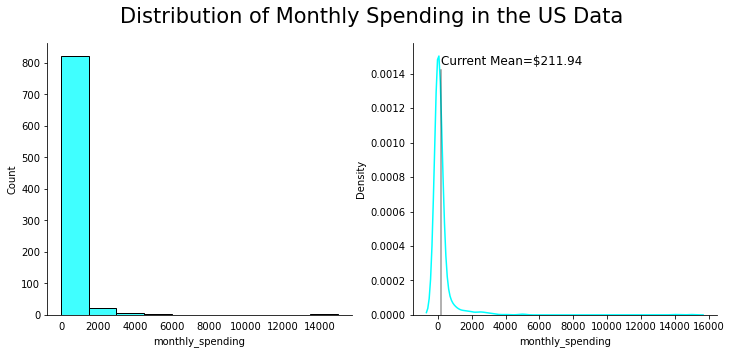

(-15.001, 1500.0]     823
(1500.0, 3000.0]       25
(3000.0, 4500.0]        3
(4500.0, 6000.0]        2
(13500.0, 15000.0]      2
(6000.0, 7500.0]        0
(7500.0, 9000.0]        0
(9000.0, 10500.0]       0
(10500.0, 12000.0]      0
(12000.0, 13500.0]      0
Name: monthly_spending, dtype: int64 



In [307]:
us_data = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='United States of America')]
fig=plt.figure(figsize=(12,5))

#Plot Histogram
ax1=fig.add_subplot(1,2,1)
sns.histplot(us_data['monthly_spending'],bins=10,color='aqua')
sns.despine()
ax1.tick_params(bottom=False,right=False)

#Plot KDE plot
ax2=fig.add_subplot(1,2,2)
sns.kdeplot(us_data['monthly_spending'],color='aqua')
sns.despine()

prev_us_mean = us_data['monthly_spending'].mean()
ax2.axvline(x=prev_us_mean,
            ymin=0,ymax=0.9,
            alpha=0.4,color='black')

plt.text(s='Current Mean=${}'.format(round(prev_us_mean,2)),
         x=prev_us_mean,y=.00145,
         fontsize=12)

plt.suptitle('Distribution of Monthly Spending in the US Data',fontsize=21)
plt.show()
print(us_data['monthly_spending'].value_counts(bins=10),'\n')

From the above plot it is immediately noticeable that a significant number of values in the US data is less than \\$1500.00. We shall take a look at the data associated to coders who have a monthly spending greater than \\$1500. We shall view it from the perspective of whether these coders attended bootcamp.

[Bootcamps](https://www.computerscience.org/bootcamps/resources/bootcamp-cost/) tend to be expensive programs. It is most likely that these coders may have spent this hefty amount to attend classes associated to these bootcamps.

In [308]:
#Analyse monthly spending vs. bootcamp attendance
column_set=['BootcampName','MonthsProgramming','MoneyForLearning','monthly_spending']
us_data[(us_data['monthly_spending']>1500)][column_set]

,BootcampName,MonthsProgramming,MoneyForLearning,monthly_spending
415,The Iron Yard,6.0,14000.0,2333.333333
484,Codesmith,7.0,20000.0,2857.142857
841,Prime Digital Academy,9.0,18000.0,2000.000000
1152,New York Code + Design Academy,2.0,4000.0,2000.000000
1334,Codesmith,7.0,17000.0,2428.571429
2330,NaN,4.0,7000.0,1750.000000
2640,Hack Reactor,12.0,20000.0,1666.666667
2926,The Firehose Project,4.0,8000.0,2000.000000
4014,Flatiron School,8.0,20000.0,2500.000000
5894,NaN,8.0,20000.0,2500.000000


In [309]:
no_bootcamp_high_spending = us_data[(us_data['monthly_spending']>=1500) & (us_data['BootcampName'].notnull()==True)].shape[0]
bootcamp_highspending = us_data[(us_data['monthly_spending']>=1500) & (us_data['BootcampName'].notnull()==True)].shape[0]
low_spending = us_data[(us_data['monthly_spending']<=1500)].shape[0]

print("Number of new coders that \033[4mdid not attend bootcamp \033[0m but have \033[4m registered a high spending\033[0m:\033[1m{}\033[0m\n".format(no_bootcamp_high_spending))
print("Number of new coders that \033[4mdid attend bootcamp \033[0m and \033[4m registered a high spending\033[0m:\033[1m{}\033[0m\n".format(bootcamp_highspending))
print("Number of new coders that \033[4mdid not register a high spending\033[0m:\033[1m{}\033[0m\n".format(low_spending))

Number of new coders that did not attend bootcamp  but have  registered a high spending:19

Number of new coders that did attend bootcamp  and  registered a high spending:19

Number of new coders that did not register a high spending:823



While one half of the new coders have attended a bootcamp, the other half have not attended a bootcamp. This does not fully validate our assumption about why new coders have incurred such high costs. We shall assess the impact of removal of this data from the US dataset.

In [310]:
greater_than_1500 = us_data[(us_data['monthly_spending']>=1500)].shape[0]
percentage_more_1500 = round((greater_than_1500/us_data['monthly_spending'].shape[0])*100,2)
print('\033[1m{}%\033[0m of data will be removed.'.format(percentage_more_1500))

3.86% of data will be removed.


Considering that **these outliers significantly affect the data** and since we are not in the **business of selling bootcamps**, we shall remove the data. We shall try and use these same consideration when evaluating the outliers of the other markets.

In [311]:
#Drop US outliers
us_outliers = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='United States of America') & 
                                   (survey_monthly_spent['monthly_spending']>=1500)]
survey_monthly_spent=survey_monthly_spent.drop(us_outliers.index)

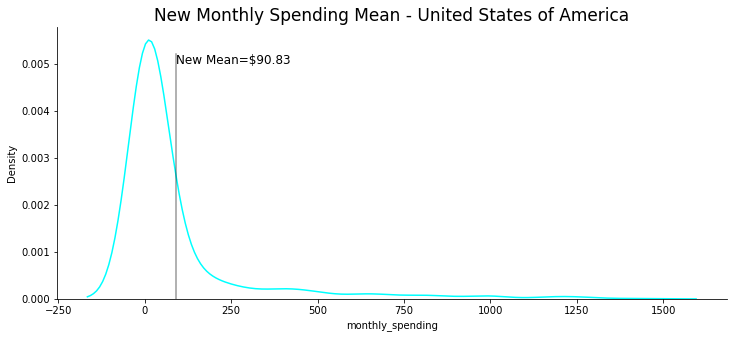

In [312]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#Defining the size of the figure
fig = plt.figure(figsize=(12,5))

plt.title('New Monthly Spending Mean - United States of America',fontsize=17)
us_mean_spend = survey_monthly_spent[survey_monthly_spent['CountryLive']=='United States of America']['monthly_spending']
sns.kdeplot(us_mean_spend,color='aqua')
sns.despine()

new_us_mean = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='United States of America')]['monthly_spending'].mean()
plt.axvline(x=new_us_mean,
            ymin=0,ymax=0.9,
            alpha=0.4,color='black')

plt.text(s='New Mean=${}'.format(round(new_us_mean,2)),
         x=new_us_mean,y=.005,
         fontsize=12)

plt.show()

### India Outliers

Next we shall assess the outliers in the Indian dataset.

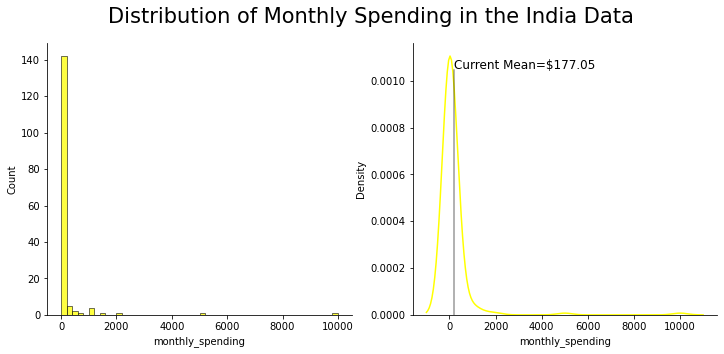

(-10.001, 200.0]     143
(200.0, 400.0]         5
(800.0, 1000.0]        4
(1400.0, 1600.0]       1
(4800.0, 5000.0]       1
(1800.0, 2000.0]       1
(9800.0, 10000.0]      1
(400.0, 600.0]         1
(600.0, 800.0]         1
(1200.0, 1400.0]       0
(6000.0, 6200.0]       0
(6400.0, 6600.0]       0
(6600.0, 6800.0]       0
(6800.0, 7000.0]       0
(7000.0, 7200.0]       0
Name: monthly_spending, dtype: int64 



In [313]:
india_data = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='India')]
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
sns.histplot(india_data['monthly_spending'],bins=50,color='yellow')
sns.despine()
ax1.tick_params(top=False,right=False)

ax2=fig.add_subplot(1,2,2)
sns.kdeplot(india_data['monthly_spending'],color='yellow')
sns.despine()

prev_india_mean = india_data['monthly_spending'].mean()
ax2.axvline(x=prev_india_mean,
            ymin=0,ymax=0.9,
            alpha=0.4,color='black')
plt.text(s='Current Mean=${}'.format(round(prev_india_mean,2)),
         x=prev_india_mean,
         y=.00105,
         fontsize=12)

plt.suptitle('Distribution of Monthly Spending in the India Data',fontsize=21)
plt.show()
print(india_data['monthly_spending'].value_counts(bins=50).head(15),'\n')

Based on the [exchange rate in 2017](https://www.poundsterlinglive.com/bank-of-england-spot/historical-spot-exchange-rates/usd/USD-to-INR-2017) **\\$1.00 = Rs. 65**. With this exchange rate, spending a **\\$1000 would mean spending Rs.65000**. This **value is significantly high** considering that a [report done by KPMG](https://assets.kpmg/content/dam/kpmg/in/pdf/2017/05/Online-Education-in-India-2021.pdf) in 2017 projected that the average transaction value range for **online graduation courses** will be between **Rs.15000-Rs.20000** in 2021.

So in 2017, this range should have been significantly lesser. Lets quickly verify whether these coders attended any bootcamps that may have significantly increased their monthly learning costs.

The reason why a number of values of this type may have appeared in the dataset may have been because of the way the question may have been presented to the participants. They may have assumed that the cost was in Indian Rupees. But this is just an assumption.

In [314]:
india_data[(india_data['monthly_spending']>200)][column_set]

,BootcampName,MonthsProgramming,MoneyForLearning,monthly_spending
1584,NaN,4.0,1000.0,250.000000
1810,NaN,8.0,5000.0,625.000000
5884,NaN,1.0,500.0,500.000000
6108,NaN,1.0,400.0,400.000000
6350,NaN,10.0,15000.0,1500.000000
7962,NaN,10.0,10000.0,1000.000000
8126,NaN,1.0,5000.0,5000.000000
12451,NaN,4.0,8000.0,2000.000000
13398,NaN,2.0,20000.0,10000.000000
13583,NaN,1.0,1000.0,1000.000000


None of the new coders that have a higher monthly spend have attended a boot camp. Based on this understanding and giving the benefit of the doubt that the new coders did actually incur such high costs for some very specialized courses, we shall **consider all monthly spending values up to $400**. For India, anything beyond \\$400 will be considered an outlier.

In [315]:
india_outliers = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='India')&
                                      (survey_monthly_spent['monthly_spending']>400)]
survey_monthly_spent=survey_monthly_spent.drop(india_outliers.index)

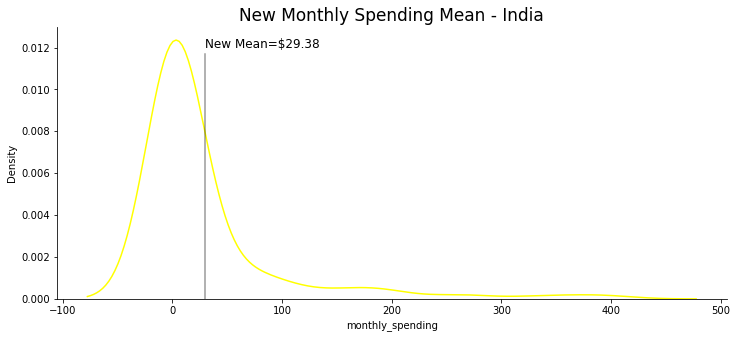

In [316]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#Defining the size of the figure
fig = plt.figure(figsize=(12,5))

plt.title('New Monthly Spending Mean - India',fontsize=17)
india_mean_spend = survey_monthly_spent[survey_monthly_spent['CountryLive']=='India']['monthly_spending']
sns.kdeplot(india_mean_spend,color='yellow')
sns.despine()

new_india_mean = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='India')]['monthly_spending'].mean()
plt.axvline(x=new_india_mean,
            ymin=0,ymax=0.9,
            alpha=0.4,color='black')

plt.text(s='New Mean=${}'.format(round(new_india_mean,2)),
         x=new_india_mean,y=.012,
         fontsize=12)
plt.show()

### Canada Outliers

Next lets find out whether Canada has any significant outliers

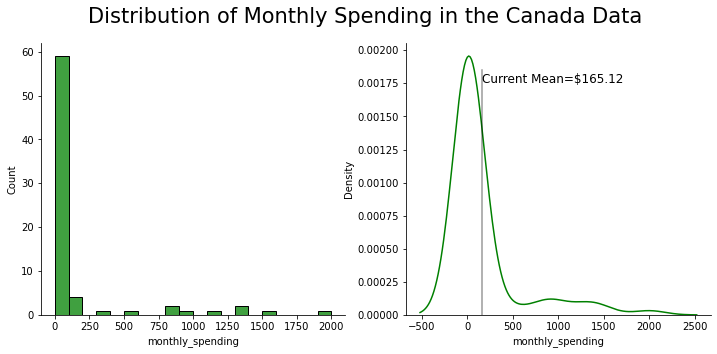

(-2.001, 100.0]     59
(100.0, 200.0]       4
(800.0, 900.0]       3
(1300.0, 1400.0]     2
(1400.0, 1500.0]     1
(1000.0, 1100.0]     1
(500.0, 600.0]       1
(300.0, 400.0]       1
(1900.0, 2000.0]     1
(600.0, 700.0]       0
(700.0, 800.0]       0
(900.0, 1000.0]      0
(400.0, 500.0]       0
(1100.0, 1200.0]     0
(1200.0, 1300.0]     0
Name: monthly_spending, dtype: int64 



In [317]:
canada_data = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='Canada')]
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
sns.histplot(canada_data['monthly_spending'],bins=20,color='green')
sns.despine()
ax1.tick_params(top=False,right=False)

ax2=fig.add_subplot(1,2,2)
sns.kdeplot(canada_data['monthly_spending'],color='green')
sns.despine()

prev_canada_mean = canada_data['monthly_spending'].mean()
ax2.axvline(x=prev_canada_mean,
            ymin=0,ymax=0.9,
            alpha=0.4,color='black')
plt.text(s='Current Mean=${}'.format(round(prev_canada_mean,2)),
         x=prev_canada_mean,
         y=.00175,
         fontsize=12)

plt.suptitle('Distribution of Monthly Spending in the Canada Data',fontsize=21)
plt.show()
print(canada_data['monthly_spending'].value_counts(bins=20).head(15),'\n')

The data size related to Canada is small and a signficant portion of the monthly spending is under \\$100.00. Moreover the monthly spending is distributed across various ranges. Since the number of values across most of these ranges are small, we shall **remove** rows represented by monthly spending, whose **ranges are represented less than 4 times**.

In [318]:
outlier = canada_data[(canada_data['monthly_spending'].between(800.0, 900.0)) |
                               (canada_data['monthly_spending'].between(1300.0, 1400.0)) | 
                               (canada_data['monthly_spending'].between(1400.0, 1500.0)) |
                               (canada_data['monthly_spending'].between(1000.0, 1100.0)) | 
                               (canada_data['monthly_spending'].between(500.0, 600.0)) | 
                               (canada_data['monthly_spending'].between(300.0, 400.0)) | 
                               (canada_data['monthly_spending'].between(1900.0, 2000.0))][column_set]

In [319]:
rounded_percentage = round((outlier.shape[0]/canada_data.shape[0])*100,2)
print('\033[1m{}%\033[0m of data that will be removed'.format(rounded_percentage))

13.7% of data that will be removed


**13.7% seems to be a significant amount** of data to be lost. However it must be noted that many of the **values are singletons in their own ranges**, keeping them would only serve to **provide us with a distorted mean**. Our goal is to arrive at a market that would be most favourable for advertising. With this regard a strict focus must be kept on getting the right mean.

In [320]:
canada_outliers = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='Canada')&
                                       ((survey_monthly_spent['monthly_spending'].between(800.0, 900.0)) |
                                       (survey_monthly_spent['monthly_spending'].between(1300.0, 1400.0)) | 
                                       (survey_monthly_spent['monthly_spending'].between(1400.0, 1500.0)) |
                                       (survey_monthly_spent['monthly_spending'].between(1000.0, 1100.0)) | 
                                       (survey_monthly_spent['monthly_spending'].between(500.0, 600.0)) | 
                                       (survey_monthly_spent['monthly_spending'].between(300.0, 400.0)) | 
                                       (survey_monthly_spent['monthly_spending'].between(1900.0, 2000.0)))]
survey_monthly_spent=survey_monthly_spent.drop(canada_outliers.index)

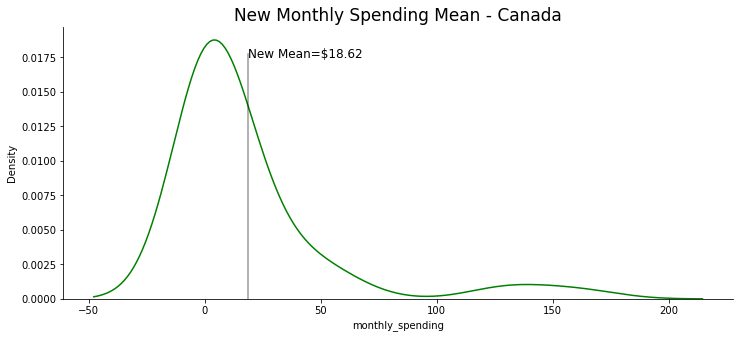

In [321]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#Defining the size of the figure
fig = plt.figure(figsize=(12,5))

plt.title('New Monthly Spending Mean - Canada',fontsize=17)
canada_mean_spend = survey_monthly_spent[survey_monthly_spent['CountryLive']=='Canada']['monthly_spending']
sns.kdeplot(canada_mean_spend,color='green')
sns.despine()

new_canada_mean = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='Canada')]['monthly_spending'].mean()
plt.axvline(x=new_canada_mean,
            ymin=0,ymax=0.9,
            alpha=0.4,color='black')

plt.text(s='New Mean=${}'.format(round(new_canada_mean,2)),
         x=new_canada_mean,y=.0175,
         fontsize=12)
plt.show()

### UK Outliers

Our final evaluation will be against the outliers that might exist in the UK market.

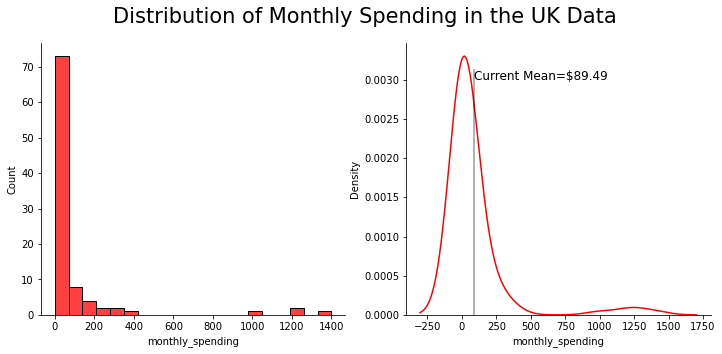

(-1.4009999999999998, 70.0]    74
(70.0, 140.0]                   7
(140.0, 210.0]                  4
(210.0, 280.0]                  2
(280.0, 350.0]                  2
(1190.0, 1260.0]                2
(980.0, 1050.0]                 1
(1330.0, 1400.0]                1
(350.0, 420.0]                  1
(560.0, 630.0]                  0
(630.0, 700.0]                  0
(490.0, 560.0]                  0
(770.0, 840.0]                  0
(840.0, 910.0]                  0
(910.0, 980.0]                  0
Name: monthly_spending, dtype: int64 



In [322]:
uk_data = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='United Kingdom')]
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(1,2,1)
sns.histplot(uk_data['monthly_spending'],bins=20,color='red')
sns.despine()
ax1.tick_params(top=False,right=False)

ax2=fig.add_subplot(1,2,2)
sns.kdeplot(uk_data['monthly_spending'],color='red')
sns.despine()

prev_uk_mean = uk_data['monthly_spending'].mean()
ax2.axvline(x=prev_uk_mean,
            ymin=0,ymax=0.9,
            alpha=0.4,color='black')
plt.text(s='Current Mean=${}'.format(round(prev_uk_mean,2)),
         x=prev_uk_mean,
         y=.0030,
         fontsize=12)

plt.suptitle('Distribution of Monthly Spending in the UK Data',fontsize=21)
plt.show()
print(uk_data['monthly_spending'].value_counts(bins=20).head(15),'\n')

Using the same logic as we did for the Canadian data we will be **removing monthly spendings above \\$210.00** as they are considered as outliers.

In [323]:
outlier = uk_data[(uk_data['monthly_spending']>210)][column_set]
rounded_percentage = round((outlier.shape[0]/uk_data.shape[0])*100,2)
print('\033[1m{}%\033[0m of data that will be removed.'.format(rounded_percentage))

9.57% of data that will be removed.


In [324]:
uk_outliers = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='United Kingdom')&
                                      (survey_monthly_spent['monthly_spending']>210)]
survey_monthly_spent=survey_monthly_spent.drop(uk_outliers.index)

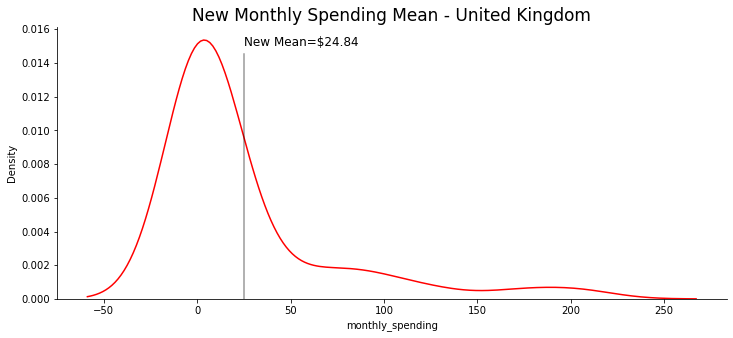

In [325]:
fig = plt.figure(figsize=(12,5))

plt.title('New Monthly Spending Mean - United Kingdom',fontsize=17)
uk_mean_spend = survey_monthly_spent[survey_monthly_spent['CountryLive']=='United Kingdom']['monthly_spending']
sns.kdeplot(uk_mean_spend,color='red')
sns.despine()

new_uk_mean = survey_monthly_spent[(survey_monthly_spent['CountryLive']=='United Kingdom')]['monthly_spending'].mean()
plt.axvline(x=new_uk_mean,
            ymin=0,ymax=0.9,
            alpha=0.4,color='black')

plt.text(s='New Mean=${}'.format(round(new_uk_mean,2)),
         x=new_uk_mean,y=.015,
         fontsize=12)

plt.show()

Now that we have eliminated most of the outliers we shall examine the monthly spending for the four markets again.

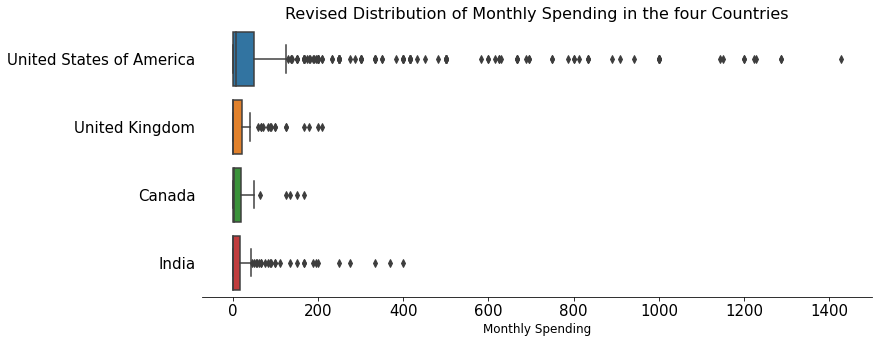

In [326]:
import seaborn as sns
fig=plt.figure(figsize=(12,5))
plt.title('Revised Distribution of Monthly Spending in the four Countries',fontsize=16)
sns.boxplot(data=survey_monthly_spent, y='CountryLive',x='monthly_spending')
sns.despine(left=True)
plt.tick_params(left=False,labelsize=15)
plt.ylabel(None)
plt.xlabel(xlabel='Monthly Spending',fontsize=12)
plt.show()

While the spread of monthly spending seems almost as same as earlier, they do not appear as outlandish as they were. We shall analyze the mean monthly spending for the four countries.

[Index](#Index)

# 7

## So How Mean.. I mean, Market Mean
**Analyzing the Monthly Mean Spending for the identified markets**

Now that we have removed the outliers we can re-calculate the monthly spending mean for each country and identify countries should be considered for advertising.

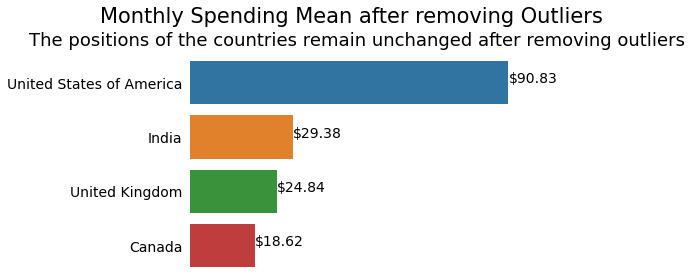

In [327]:
country_spending = survey_monthly_spent.groupby('CountryLive')['monthly_spending'].mean().round(2).sort_values(ascending=False)


sns.barplot(y=country_spending.index,x=country_spending)
sns.despine(left=True,bottom=True)
plt.tick_params(bottom=False,left=False,labelbottom=False,labelsize=14)
plt.xlabel(None)
plt.ylabel(None)

for i in range(len(country_spending)):
    plt.text(s='$'+str(country_spending[i]),
             x=country_spending[i],
             y=i,size=14)
    
plt.suptitle('Monthly Spending Mean after removing Outliers',fontsize=21,va='bottom')
plt.title('The positions of the countries remain unchanged after removing outliers',fontsize=18,va='bottom')
plt.show()

Clearly the **USA is an excellent market** to be considered for advertising. Of the other three countries India could also be considered albeit at a lower subscription cost if that is possible. India is an emerging market and based on the [report](https://assets.kpmg/content/dam/kpmg/in/pdf/2017/05/Online-Education-in-India-2021.pdf) shared earlier the projected growth of the e-platform business is huge.

It must be noted that in removing the outliers we have had to make many assumptions. There were many outliers that remained. The outliers were removed based on what knowledge was available to us. 

Despite removing a number of outliers from the data set associated to India, it still remains in the second position for markets to advertise in. This is despite the UK and Canada having a higher GDP per capita. The reason for this is that the number of Indian participants is significantly higher than those of UK and Canada. Also Canada and the UK had more single outliers which were removed causing their averages to plunge.

Now despite these averages and given the price of our subscription it may look like there is no second market. However the marketing department is welcome to take a look at our analysis and get back on whether we have been too strict with setting our outliers and how we selected job roles.

[Index](#Index)

# 8

## Conclusion

E-Learning platforms have become big business in the recent decade with the explosion of the internet in all corners of the world. This explosion has given rise to stiff competition to new players in the market. We were approached by an E-Learning platform to analyse for markets to advertise their product.

We analysed the 2017 freeCodeCamp survey for markets in which to advertise. Initially we identified 10 countries of which we chose the top four due to the prominence of the English language in them as the courses on the E-Learning platform are in English. The top four countries identified include the USA, India, Canada and the UK. During the analysis of the average monthly spending of these four countries it was realized that the spending of India seem to be higher than the UK and Canada. This finding was suspiciously at odds with the GDP per capita of India when compared against the same parameter for the UK and Canada.

After removing outlier values for the four countries, we were able to get more realistic monthly spending values. The findings for the same have been detailed above. We concluded that the USA was an excellent potential market. We avoided selecting a second market and have left it to the marketing department to take a look at our report and let us know whether they have some suggestions regarding the assumptions we took with regards to how we selected the outliers and the job roles favoured by new participants.

# 9

## Learnings

- Exploding barcharts - https://towardsdatascience.com/customizing-multiple-subplots-in-matplotlib-a3e1c2e099bc
- KDE plot - https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

[Index](#Index)